# NLP EDA

Basically, exploration and modeling boil down to a single question:

How do we quantify our data (/a document)?

In this lesson, we'll explore answers to this question that will aid in visualization.

- word frequency (by label)
- ngrams
- word cloud
- sentiment analysis
- other common features

## Setup

Data is spam/ham text messages.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import unicodedata
import re

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [11]:
df = pd.read_csv('./spam_clean.csv')
print(df.shape)
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

## Exploration

Represent text as word frequencies (almost bag of words).

In [14]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [15]:
spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [16]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
im,458,13,471
get,314,83,397
go,273,31,304
ok,272,5,277
dont,268,22,290


- What are the most frequently occuring words?
- Are there any words that uniquely identify a spam or ham message? I.e. words present in one type of message but not the other?

### Visualization

- ham vs spam count for 20 most common words
- ham vs spam proportion for 20 most common words

## n-grams

**bigram**: combinations of 2 words

Technique 2: represent text as combinations of 2 words

- what are the most common bigrams? spam bigrams? ham bigrams?
- visualize 20 most common bigrams, most common ham bigrams
- ngrams

Find the most common bigram and then find a representative text

## Word Cloud

(-0.5, 399.5, 199.5, -0.5)

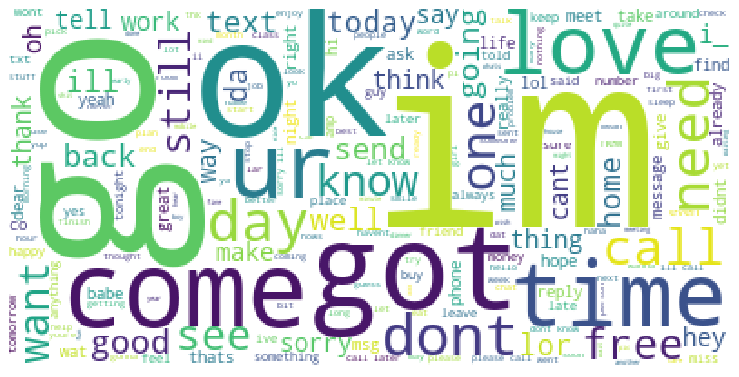

In [9]:
from wordcloud import WordCloud

img = WordCloud(background_color='white').generate(' '.join(all_words))
plt.imshow(img)
plt.axis('off')

## Other Common Features

Any NLP dataset will have domain specific features, for example: number of retweets, number of @mentions, number of upvotes, or mean time to respond to a support chat. In addition to these domain specific features, some common measures for a document are:

- character count
- word count
- sentence count
- stopword count
- unique word count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio

## Sentiment

A number indicating whether the document is positive or negative.

- knowledge-based + statistical approach
- relies on human-labelled data
    - valence scored wordlists
    - overall labels, measure is how well it compares to human judgement
- different models for diff domains (e.g. social media vs news)
- for social media
    - Afinn ([github](https://github.com/fnielsen/afinn) + [whitepaper](http://www2.imm.dtu.dk/pubdb/edoc/imm6006.pdf))
    - Vader ([whitepaper](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf) `nltk.sentiment.vader.SentimentIntensityAnalyzer`)


In [10]:
import nltk.sentiment

sia = nltk.sentiment.SentimentIntensityAnalyzer()
sia.polarity_scores('This food is bad')

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

## More Exercises

- [kaggle wikipedia movie plots](https://www.kaggle.com/jrobischon/wikipedia-movie-plots)
    - narrow to top n genres that aren't unknown
- [wikitable extractor](https://wikitable2csv.ggor.de/) for use with [helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes)
- Try out textblob